# Exercise 1
In this exercise we will be rescaling images. For that we will implement several methods of rescaling an image.
1. Nearest Neighbour
2. Bilinear Scaling
3. Seam Carving<br>


**Nearest neighbour** is already implemented as an example.<br>
Adding seams is a bonus.<br>


**You may only use numpy, matplotlib, numba and any builtin libraries in python.**
It is recommended to install all these libraries using *pip*.


## Submission Guidelines
**Write all the code in the adjoined seam_carving.py file**. Only submit that file! <br>
This notebook is meant to instruct you and to allow you to test your code.

Feel free to try things out and experiment with the functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from functools import partial
from numba import jit
import ex1.seam_carving as seam_carving

When converting image to greyscale we use a weighted average on the red green and blue values of each pixel. Intuitively it seems like simple average will work best, but it is actually better to use the weights given below (red, green and blue respectively). We will learn why on unit 4. That being said, feel free to play with the weights to see the different results.

In [3]:
greyscale_wt = [0.299, 0.587, 0.114]

We have already implemented functions to read and write images, feel free to use them. Whenn printing images make sure that they are either floats with values between 0 and 1 or integers with values 0 to 255.

In [4]:
def read_image(path):
    """
    Reads and image from path
    :param path: The path to the image
    :returns: The image as numpy array
    """
    return mpimg.imread(path)

In [5]:
def show_image(image, greyscale = False):
    """
    Displays an image
    :param image: The image to be displayed
    :param greyscale: boolean which signifies whether the image 
        is in grey scale (where each pixel is represented by a single number)
    """
    fig, ax = plt.subplots()
    if not greyscale:
        ax.imshow(image)
    else:
        ax.imshow(image,cmap=plt.get_cmap('gray'))
    ax.axis("off")
    plt.show()

We have supplied you with two images on which you can experiment. Below, under path, put the path of the selected image. Do not use absolute paths

In [6]:
path = "pixel.jpg"
image = read_image(path)

(369, 492, 3)


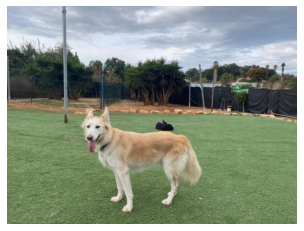

In [7]:
print(image.shape)
show_image(image)

**TODO**: Implement a function that converts an image to greyscale (5 points)

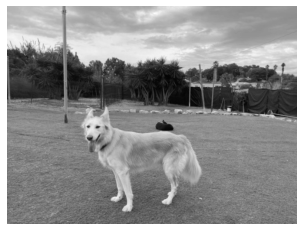

In [8]:
greyscale = seam_carving.get_greyscale_image(image, greyscale_wt)
show_image(greyscale, greyscale=True)

### Nearest Neighbour
This is an example, please read it and make sure you understand

In [9]:
def reshape_nearest_neighbour(image, new_shape):
    """
    Resizes an image to new shape using nearest neighbour method
    :param image: The original image
    :param new_shape: a (height, width) tuple which is the new shape
    :returns: the image resized to new_shape
    """
    in_height, in_width, _ = image.shape
    out_height, out_width = new_shape
    new_image = np.zeros(new_shape)

    def get_scaled_param(org, size_in, size_out):
        scaled_org = np.round((org * size_in) / size_out)
        scaled_org = int(min(scaled_org, size_in - 1))
        return scaled_org

    scaled_x_grid = [get_scaled_param(x,in_width,out_width) for x in range(out_width)]
    scaled_y_grid = [get_scaled_param(y,in_height,out_height) for y in range(out_height)]
    new_image = image[scaled_y_grid][:, scaled_x_grid]

    return new_image

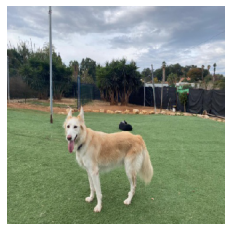

In [10]:
new_shape = (300, 300)
new_image = reshape_nearest_neighbour(image, new_shape)
show_image(new_image)

### Bilinear (15 pts)
**TODO:** Implement a function that resizes an image using the bilinear method as learnt in class

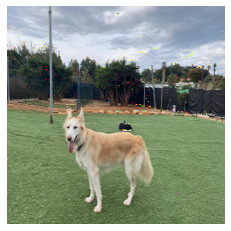

In [11]:
new_shape = (300, 300)
new_image = seam_carving.reshape_bilinear(image, new_shape)
show_image(new_image)

## Seam Carving
We will now implement seam carving. **TODO:** implement the caculation of the pixel energy as the gradient magnitude of the image **in greyscale**. The function should return the gradient image. (5 points)

Display the gradient magintude of the image. What do you see?

/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:48: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "gradient_magnitude" failed type inference due to: Untyped global name 'get_greyscale_image': cannot determine Numba type of <class 'function'>

File "ex1/seam_carving.py", line 56:
def gradient_magnitude(image, colour_wts):
    <source elided>
    """
    greyscale = get_greyscale_image(image, colour_wts)
    ^

  @numba.jit()
/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "gradient_magnitude" was compiled in object mode without forceobj=True.

File "ex1/seam_carving.py", line 49:
@numba.jit()
def gradient_magnitude(image, colour_wts):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mod

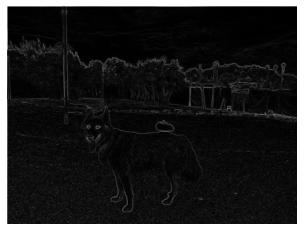

In [12]:
show_image(seam_carving.gradient_magnitude(image, greyscale_wt), greyscale=True)

Now it is up to you. Implement the seams carving algorithm to remove seams. Implement this by calculating the seams using what we have learned in classs (forward looking with gradient magnitude as pixel energy). The implementation should support three carving schemes: remove all vertical seams then all horizontal seams, remove all horizontal seams then all vertical seams and remove vertical and horizontal seams intermittently.

First, implement a function **visualise_seams** that colours the seams that were removed from an image. The colouring should be performed on the original image! This should only support seams removal, not seams addition.

As we are only implementing seam removal in this exercise, make sure to check that the new shape of the image is indeed smaller then the original

#### Example:

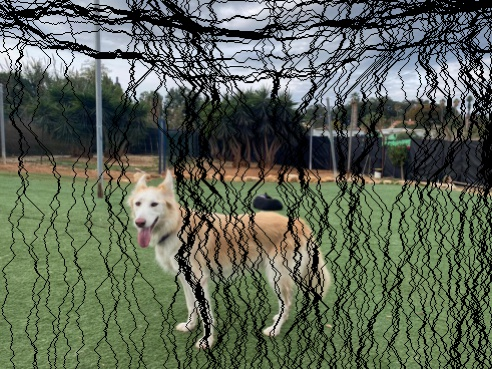

In [13]:
#seam_carving.cut_seam(image, 200)

In [14]:
#show_image(seam_carving.cut_seam(image))

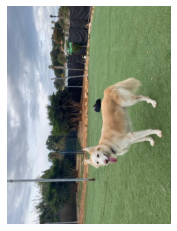

In [15]:
show_image(seam_carving.flippa_left(image.copy()))

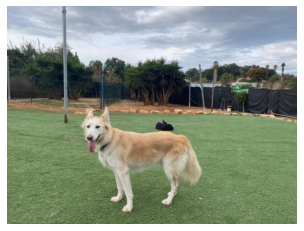

In [16]:
show_image(seam_carving.flippa_back(seam_carving.flippa_left(image.copy())))

In [17]:
#show_image(seam_carving.reshape_seam_crarving(image,[100,300], None))

/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:69: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "energy" failed type inference due to: Invalid use of type(CPUDispatcher(<function gradient_magnitude at 0x7fe8e08b68b0>)) with parameters (readonly array(uint8, 3d, C), list(float64)<iv=None>)

During: resolving callee type: type(CPUDispatcher(<function gradient_magnitude at 0x7fe8e08b68b0>))
During: typing of call at /Users/ilana/Projects/graphics-hw/ex1/seam_carving.py (77)


File "ex1/seam_carving.py", line 77:
def energy(image, forward=False):
    <source elided>
    height, width = image.shape[:2]
    image = gradient_magnitude(image, [0.299, 0.587, 0.114])
    ^

  @numba.jit()
/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:69: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "energy" failed type inference due to: cannot determine Numba type of <class 'numba.core.

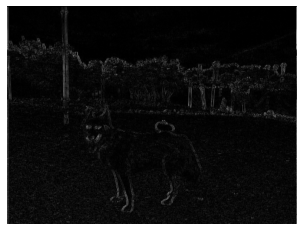

In [18]:
show_image(seam_carving.energy(image, forward=True), greyscale=True)

/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:154: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "calc_seam" failed type inference due to: Untyped global name 'reversed': cannot determine Numba type of <class 'type'>

File "ex1/seam_carving.py", line 164:
def calc_seam(image, seams):
    <source elided>

        for j in reversed(range(height)):
        ^

  @numba.jit()
/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:154: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "calc_seam" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "ex1/seam_carving.py", line 161:
def calc_seam(image, seams):
    <source elided>
   
    for i in range(seams):
    ^

  @numba.jit()
/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "calc_seam" was compiled in o

/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "calc_seam" was compiled in object mode without forceobj=True.

File "ex1/seam_carving.py", line 161:
def calc_seam(image, seams):
    <source elided>
   
    for i in range(seams):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "ex1/seam_carving.py", line 161:
def calc_seam(image, seams):
    <source elided>
   
    for i in range(seams):
    ^

  warnings.warn(errors.NumbaDeprecationWarning(msg,
/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:108: Numb

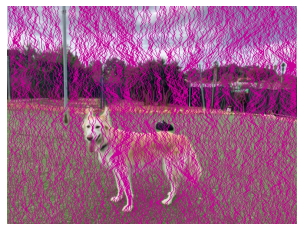

In [19]:
show_image(seam_carving.visualise_seams(image, (300,300), False, (200,0,150)))

In [20]:
#print(seam_carving.energy(image))

In [21]:
VERTICAL_HORIZONTAL = 0
HORIZONTAL_VERTICAL = 1
INTERMITTNET = 2

Now, implement the function **reshape_seam_crarving** to reshape an image using seam carving. Again, note that we only support seam removal in this exercise, so make sure to check that the new shape is valid.

#### Bonus (5 pts)
For 5 point bonus, implement adding seams as well

#### Example:

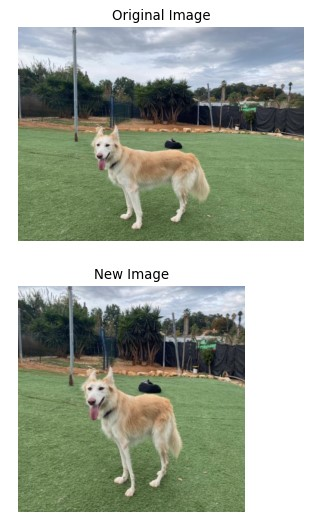

In [22]:
# Use this function to compare results
def compare_images(org, new):
    org_height, org_width, _ = org.shape
    new_height, new_width, _ = new.shape
    dpi = 80
    fig, ax = plt.subplots()
    fig.set_size_inches(org_height / dpi, org_width / dpi)
    fig.set_dpi(80)
    ax.set_title("Original Image")
    ax.imshow(org)
    ax.axis("off")
    plt.savefig("org.jpg", bbox_inches="tight", pad_inches=0.0)
    fig, ax = plt.subplots()
    fig.set_size_inches(new_height / dpi, new_width / dpi)
    fig.set_dpi(80)
    ax.set_title("New Image")
    ax.imshow(new)
    ax.axis("off")
    plt.savefig("new.jpg", bbox_inches="tight", pad_inches=0.0)
    plt.show()

In [ ]:
new_shape = (600, 900)
carve_mode = VERTICAL_HORIZONTAL
new_img = seam_carving.reshape_seam_crarving(image, new_shape, carve_mode)
compare_images(image, new_img)

/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:216: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "reshape_seam_crarving" failed type inference due to: Untyped global name 'delete_horz_seams': cannot determine Numba type of <class 'function'>

File "ex1/seam_carving.py", line 238:
def reshape_seam_crarving(image, new_shape, carving_scheme):
    <source elided>
    if carving_scheme == 0:
        return delete_horz_seams(delete_vert_seams(image, abs(image.shape[1] - new_shape[1]), w_scale_factor), abs(image.shape[0] - new_shape[0]), h_scale_factor)
        ^

  @numba.jit
/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:216: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "reshape_seam_crarving" failed type inference due to: Untyped global name 'delete_horz_seams': cannot determine Numba type of <class 'function'>

File "ex1/seam_carving.py", line 238:
def reshape_sea

/Users/ilana/Projects/graphics-hw/ex1/seam_carving.py:154: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "calc_seam" failed type inference due to: Untyped global name 'reversed': cannot determine Numba type of <class 'type'>

File "ex1/seam_carving.py", line 164:
def calc_seam(image, seams):
    <source elided>

        for j in reversed(range(height)):
        ^

  @numba.jit()
/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "calc_seam" was compiled in object mode without forceobj=True.

File "ex1/seam_carving.py", line 161:
def calc_seam(image, seams):
    <source elided>
   
    for i in range(seams):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
/Users/ilana/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been d

Try running the three methods (nearest neighbour, bilinear interpolation, seam carving) to reshape the image. Try to see if you notice any differences in the results. Think what may have caused those differences